# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt



2023-06-05 06:35:57.422868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-05 06:35:57.422923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Membaca Dataset

In [2]:
df_rating = pd.read_csv('data/tourism_rating.csv')
df_wisata = pd.read_csv('data/tourism_with_id.csv')

In [3]:
# menampilkan 5 data teratas

df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [4]:
# menampilkan 5 data teratas

df_wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# membuang kolom yang tidak diperlukan

df_wisata.drop(['Unnamed: 11', 'Unnamed: 12', 'Lat', 'Long', 'Coordinate', 'Time_Minutes'], axis=1, inplace=True)

In [6]:
df_wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5


In [7]:
# memilih hanya kota Yogyakarta saja

df_wisata = df_wisata[df_wisata['City'] == 'Yogyakarta']

# Exploratory Data Analysis

In [8]:
# menggabungkan kedua dataframe

df = pd.merge(df_rating, df_wisata, on='Place_Id')

df.head(10)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
5,76,179,1,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
6,84,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
7,127,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
8,127,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
9,134,179,2,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6


In [9]:
# menampilkan informasi pada data yang sudah digabungkan

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 0 to 2870
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        2871 non-null   int64  
 1   Place_Id       2871 non-null   int64  
 2   Place_Ratings  2871 non-null   int64  
 3   Place_Name     2871 non-null   object 
 4   Description    2871 non-null   object 
 5   Category       2871 non-null   object 
 6   City           2871 non-null   object 
 7   Price          2871 non-null   int64  
 8   Rating         2871 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 224.3+ KB


In [10]:
# Melihat nilai null pada data

df.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
dtype: int64

In [11]:
# Melihat data unique pada kolom rating,price,dan kategori

print("Data unik pada data rating: ", df['Rating'].unique())

print("Data unik pada data price: ", df['Price'].unique())

print("Data unik pada data kategori: ", df['Category'].unique())

Data unik pada data rating:  [4.6 4.  4.5 4.7 4.4 4.3 5.  4.1 4.2 4.8]
Data unik pada data price:  [ 75000      0  10000  50000   6000   3000   5000  15000  20000   2500
   2000   4000  40000 150000   8000   7000  30000  25000 220000  60000
 500000 250000  22000 100000]
Data unik pada data kategori:  ['Budaya' 'Bahari' 'Taman Hiburan' 'Cagar Alam' 'Pusat Perbelanjaan']


In [12]:
# see count of each price

df['Price'].value_counts()

10000     621
0         579
5000      510
3000      181
15000     133
50000     113
2500      108
20000     105
40000      73
2000       63
4000       47
6000       46
7000       44
30000      31
150000     29
250000     25
60000      24
75000      24
8000       22
220000     22
22000      21
500000     21
25000      17
100000     12
Name: Price, dtype: int64

In [13]:
"""
I want to normalize df['Rating'] data so that the value is between 0 until 5 because the rating value is between 0 until 5. 

I want to change the label become like this:

4.0 , 4.1 ==> 1,
4.2, 4.3 ==> 2,
4.4, 4.5 ==> 3,
4.6, 4.7 ==> 4,
4.8, 4.9, 5.0 ==> 5
"""

# change the label

df['Rating'] = df['Rating'].replace([4.0, 4.1], 0)
df['Rating'] = df['Rating'].replace([4.2, 4.3], 1)
df['Rating'] = df['Rating'].replace([4.4, 4.5], 2)
df['Rating'] = df['Rating'].replace([4.6, 4.7], 3)
df['Rating'] = df['Rating'].replace([4.8, 4.9, 5.0], 4)


# convert data to int

df["Rating"] = df["Rating"].astype(int)

df


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
...,...,...,...,...,...,...,...,...,...
2866,240,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2867,247,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2868,261,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2869,267,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3


/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


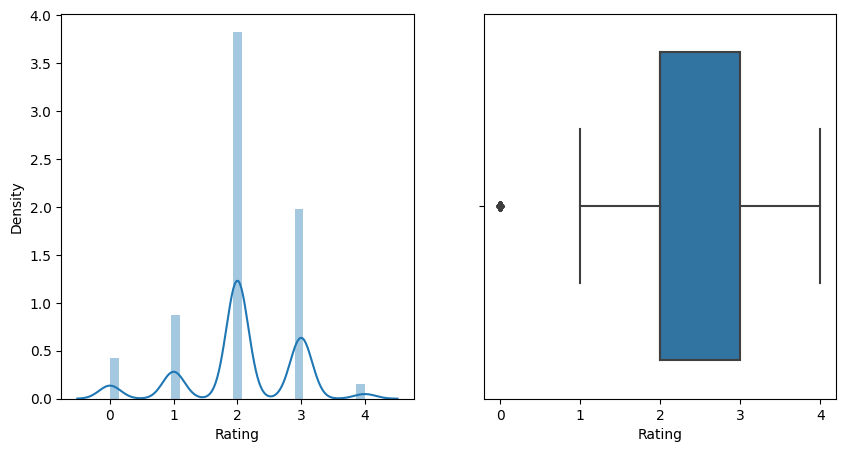

In [14]:
# Memvisualisasikan data rating dengan menggunakan histogram dan boxplot untuk melihat persebaran data dan pencilan data pada kolom rating 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Rating'])
plt.subplot(1, 2, 2)
sns.boxplot(df['Rating'])
plt.show()



/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


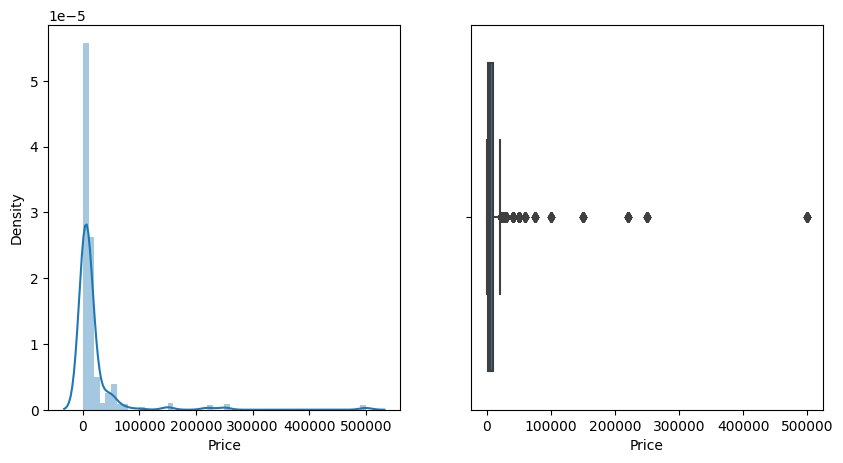

In [15]:
# Memvisualisasikan data price dengan menggunakan histogram dan boxplot untuk melihat persebaran data dan pencilan data pada kolom price

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])

plt.show()

/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


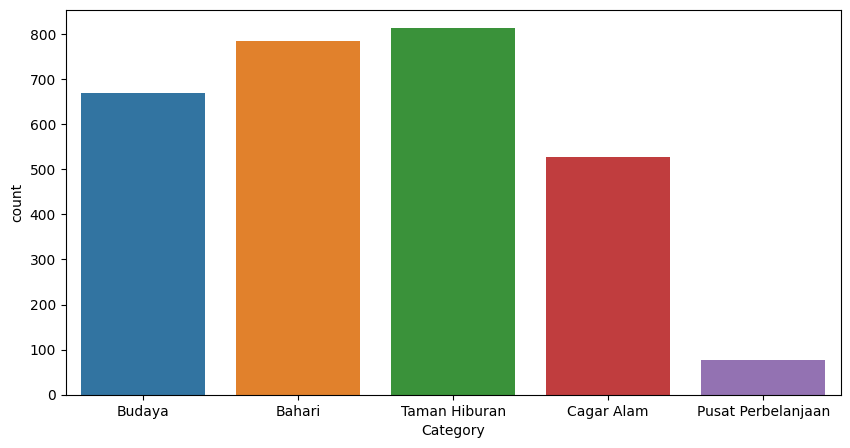

In [16]:
# Memvisualisasikan data kategori dengan menggunakan countplot untuk melihat jumlah data pada setiap kategori

plt.figure(figsize=(10, 5))
sns.countplot(df['Category'])
plt.show()



# Data Preprocessing

In [17]:
# Membuat pemodelan dengan menggunakan content based filtering dengan memilih kolom yang akan digunakan yaitu kolom Category, Rating, dan Price 

df_model = df[['Category', 'Rating', 'Price']]

df_model.head()



,Category,Rating,Price
0,Budaya,3,75000
1,Budaya,3,75000
2,Budaya,3,75000
3,Budaya,3,75000
4,Budaya,3,75000


In [18]:
# Membuat rentang harga untuk memudahkan dalam proses pemodelan 

# harga 0 - 15000 dilabel menjadi 0

df_model['Price'] = df_model['Price'].replace(range(0, 10000), 0)

# harga 15000 - 30000 dilabel menjadi 1

df_model['Price'] = df_model['Price'].replace(range(15000, 30000), 1)

# harga 30000 - 45000 dilabel menjadi 2

df_model['Price'] = df_model['Price'].replace(range(30000, 75000), 2)

# harga 45000 - 75000 dilabel menjadi 3

df_model['Price'] = df_model['Price'].replace(range(45000, 150000), 3)

# harga 75000 - 100000 dilabel menjadi 4

df_model['Price'] = df_model['Price'].replace(range(150000, 300000), 4)

# harga 100000 - 500000 dilabel menjadi 5

df_model['Price'] = df_model['Price'].replace(range(300000, 500000), 5)

/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [19]:
"""
I want to normalize df['Rating'] data so that the value is between 0 until 5 because the rating value is between 0 until 5. 

I want to change the label become like this:

4.0 , 4.1 ==> 1,
4.2, 4.3 ==> 2,
4.4, 4.5 ==> 3,
4.6, 4.7 ==> 4,
4.8, 4.9, 5.0 ==> 5
"""

# change the label

df_model['Rating'] = df_model['Rating'].replace([4.0, 4.1], 0)
df_model['Rating'] = df_model['Rating'].replace([4.2, 4.3], 1)
df_model['Rating'] = df_model['Rating'].replace([4.4, 4.5], 2)
df_model['Rating'] = df_model['Rating'].replace([4.6, 4.7], 3)
df_model['Rating'] = df_model['Rating'].replace([4.8, 4.9, 5.0], 4)


# convert data to int

df_model["Rating"] = df_model["Rating"].astype(int)

df_model


/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Category,Rating,Price
0,Budaya,3,3
1,Budaya,3,3
2,Budaya,3,3
3,Budaya,3,3
4,Budaya,3,3
...,...,...,...
2866,Taman Hiburan,3,0
2867,Taman Hiburan,3,0
2868,Taman Hiburan,3,0
2869,Taman Hiburan,3,0


In [20]:
# Melakukan label encoding pada kolom Category

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_model['Category'] = label_encoder.fit_transform(df_model['Category'])

df_model.head()

/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Projek/Wismata-C23-PS297/Machine Learning/env_capstone/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Category,Rating,Price
0,1,3,3
1,1,3,3
2,1,3,3
3,1,3,3
4,1,3,3


In [21]:
# Memilih rating sebagai target dan sisanya sebagai fitur

X = df_model.drop('Rating', axis=1)

y = df_model['Rating']





In [22]:
# Membagi data menjadi data training dan data testing dengan test size 20% dan random state 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)



# Melatih Model

In [23]:
# Membuat model machine learning dengan menggunakan algoritma deep learning yaitu neural network menggunakan tensorflow

model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(32, activation='relu'),

    # karena ini merupakan masalah klasifikasi multiclass maka pada layer output menggunakan activation softmax dan class nya ada 5 

    tf.keras.layers.Dense(6, activation='softmax')

])

# Menggunakan optimizer adam dan loss function serta menggunakan metrics accuracy

# mengeset learning rate menjadi 0.001

optimizer = tf.keras.optimizers.Adam(0.001)

loss = tf.keras.losses.SparseCategoricalCrossentropy()


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# melihat summary dari model yang telah dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 10,918
Trainable params: 10,918
Non-trainable params: 0
_________________________________________________________________


2023-06-05 06:36:27.006280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-05 06:36:27.006334: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-05 06:36:27.006372: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abdulhafidh): /proc/driver/nvidia/version does not exist
2023-06-05 06:36:27.006983: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Melakukan training model dengan data training yang telah dibagi sebelumnya dengan jumlah epoch 100 dan batch size 32

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64)


Epoch 1/200
36/36 [==============================] - 2s 24ms/step - loss: 53.9340 - accuracy: 0.3702 - val_loss: 26.7753 - val_accuracy: 0.5270
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 30.7606 - accuracy: 0.4682 - val_loss: 197.1413 - val_accuracy: 0.5270
Epoch 3/200
36/36 [==============================] - 0s 5ms/step - loss: 85.8875 - accuracy: 0.4499 - val_loss: 36.3639 - val_accuracy: 0.5270
Epoch 4/200
36/36 [==============================] - 0s 5ms/step - loss: 23.0408 - accuracy: 0.4495 - val_loss: 17.6045 - val_accuracy: 0.4296
Epoch 5/200
36/36 [==============================] - 0s 5ms/step - loss: 19.6165 - accuracy: 0.4730 - val_loss: 50.6844 - val_accuracy: 0.5357
Epoch 6/200
36/36 [==============================] - 0s 5ms/step - loss: 23.1729 - accuracy: 0.4673 - val_loss: 4.1622 - val_accuracy: 0.4626
Epoch 7/200
36/36 [==============================] - 0s 5ms/step - loss: 16.0497 - accuracy: 0.4726 - val_loss: 6.6885 - val_accuracy: 0.5357

# Convert Model to TFLite

In [27]:
# COnvert Model to TFLite

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

open("model/filtering_model.tflite", "wb").write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmpxzmj0ysx/assets


INFO:tensorflow:Assets written to: /tmp/tmpxzmj0ysx/assets
2023-06-05 06:38:33.297493: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2023-06-05 06:38:33.297565: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2023-06-05 06:38:33.298261: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpxzmj0ysx
2023-06-05 06:38:33.302311: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2023-06-05 06:38:33.302371: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/tmpxzmj0ysx
2023-06-05 06:38:33.321261: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2023-06-05 06:38:33.500875: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /tmp/tmpxzmj0ysx
2023-06-05 06:38:33.552782: I tensorflow/cc/saved_model/loader.cc:283] SavedMode

45848

In [28]:
# test tflite model 


category_test = 3

price_test = 1

input_data = np.array([[category_test, price_test]], dtype=np.float32)

interpreter = tf.lite.Interpreter(model_path="model/filtering_model.tflite")

interpreter.allocate_tensors()

input_details = interpreter.get_input_details()

output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])

print(output_data)

print(np.argmax(output_data))

[[4.1068168e-04 2.6563621e-01 7.3359126e-01 3.6026313e-04 1.5369714e-06
  7.1665174e-10]]
2
